In [1]:
import sqlite3 as db
import pandas as pd, matplotlib, seaborn, collections
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

seaborn.set_style('darkgrid')

In [2]:
conn =  db.connect('/Users/davidyerrington/virtualenvs/data/livecoding.tv/job_scraper/jobs.db')
sql  =  """
SELECT * FROM jobs
GROUP BY url
"""

jobs_df = pd.read_sql(sql, con=conn)
conn.close()

## Top 10 Companies Hiring

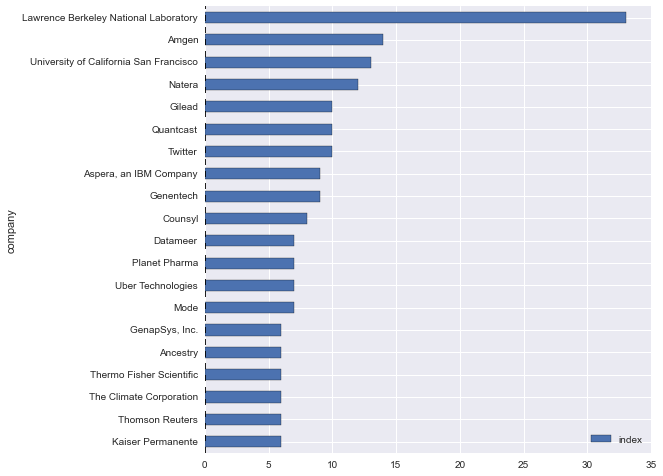

In [3]:
company_df = jobs_df.groupby(['company']).count().sort('index', ascending=False).head(20)
pd.DataFrame(company_df['index']).sort('index').plot(kind='barh', figsize=(8,8))

In [70]:
from nltk.util import ngrams
sentence = 'goodread is the only read this side of the mississippi for always and forever'
n = 5
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
  print grams


def nltk_ngram(text):
    from nltk.util import ngrams
    n = 5
    sixgrams = ngrams(text.split(), n)
    
    ngram_list = []
    
    for grams in sixgrams:
        ngram_list.append(" ".join(grams))
        
    return ngram_list


('goodread', 'is', 'the', 'only', 'read')
('is', 'the', 'only', 'read', 'this')
('the', 'only', 'read', 'this', 'side')
('only', 'read', 'this', 'side', 'of')
('read', 'this', 'side', 'of', 'the')
('this', 'side', 'of', 'the', 'mississippi')
('side', 'of', 'the', 'mississippi', 'for')
('of', 'the', 'mississippi', 'for', 'always')
('the', 'mississippi', 'for', 'always', 'and')
('mississippi', 'for', 'always', 'and', 'forever')


In [5]:
N = 3
strparts = sentence.split(' ')

collections.Counter(tuple(strparts[i:i+N]) for i in xrange(len(strparts)-N))

Counter({('and', 'i', 'want'): 1, ('is', 'a', 'foo'): 1, ('i', 'want', 'to'): 1, ('bar', 'sentences', 'and'): 1, ('this', 'is', 'a'): 1, ('a', 'foo', 'bar'): 1, ('want', 'to', 'ngramize'): 1, ('sentences', 'and', 'i'): 1, ('foo', 'bar', 'sentences'): 1})

In [6]:
jobs_df['summary'].str.join('')

0     We are seeking a Associate Scientist III for a...
1     We are looking for a Data Scientist with exper...
2     We are looking for a Data Scientist with exper...
3     Our client analyzes EHR data, text, scanned do...
4     Works with product development team of scienti...
5     Associate Scientist II - R&D*. Bachelor s degr...
6     Works with product development team of scienti...
7     Clinical Lab Scientist - Chemistry. Apply curr...
8     Demonstrated ability to analyze large data set...
9     Data mining, predictive modeling, statistics, ...
10    He should be able to find wrong presentation o...
11    The role requires someone whose passion for di...
12    We are looking for talented scientists and eng...
13    We are looking for talented scientists and eng...
14    We are looking for talented scientists and eng...
...
809    Clover Health is driving down costs and produc...
810    We’re looking for data scientists with a passi...
811    This will include the building, dis

In [7]:
summaries  = ''

for summary in jobs_df['summary'].values:
    summaries += summary

In [8]:
content_text  = ''

for text in jobs_df['content_text'].values:
    content_text += text

In [72]:
# content_text.find('men')
content_ngrams = nltk_ngram(content_text)

In [86]:
count = 0

for text in jobs_df.content_text.values:
    if text.find('mad men in') > 0:
        print text.find(u'Mad Men in')
        count += 1
        
print count

0


In [99]:
bow_content = []

for text in jobs_df.content_text.values:
    bow_content.append()

824

In [17]:
vect = TfidfVectorizer(ngram_range=(2,2))

vect.build_preprocessor()(summaries)
vect.build_tokenizer()(summaries)
ngrams_summaries = vect.build_analyzer()(summaries)

In [95]:
vect = TfidfVectorizer(ngram_range=(6,6))

vect.build_preprocessor()(content_text)
vect.build_tokenizer()(content_text)
ngrams_text = vect.build_analyzer()(content_text)

In [92]:
from itertools import tee, islice

def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break

In [94]:
len(ngrams_text)
# Counter(ngrams(ngrams_text, 2)).most_common(20)

[((u'please review all application instructions before',
   u'review all application instructions before applying'),
  116),
 ((u'now please review all application instructions',
   u'please review all application instructions before'),
  116),
 ((u'apply now please review all application',
   u'now please review all application instructions'),
  116),
 ((u'review all application instructions before applying',
   u'all application instructions before applying to'),
  116),
 ((u'drop files here attach dropbox google',
   u'files here attach dropbox google drive'),
  94),
 ((u'files here attach dropbox google drive',
   u'here attach dropbox google drive paste'),
  94),
 ((u'the military ground naval or air',
   u'military ground naval or air service'),
  80),
 ((u'to put mad men out of', u'put mad men out of business'), 80),
 ((u'please send your resume and cover', u'send your resume and cover letter'),
  80),
 ((u'ad engine to put mad men', u'engine to put mad men out'), 80),
 ((u'engi

In [28]:
from collections import Counter

counts_summary_df = pd.DataFrame(Counter(ngrams_summaries), index=['count']).T

In [56]:
Counter(ngrams_text).most_common(20)

# counts_text_df = pd.DataFrame(Counter(ngrams_text), index=['count']).T

[(u'all application instructions before applying to', 116),
 (u'review all application instructions before applying', 116),
 (u'please review all application instructions before', 116),
 (u'apply now please review all application', 116),
 (u'now please review all application instructions', 116),
 (u'files here attach dropbox google drive', 94),
 (u'here attach dropbox google drive paste', 94),
 (u'drop files here attach dropbox google', 94),
 (u'without regard to race color religion', 89),
 (u'for employment without regard to race', 88),
 (u'the military ground naval or air', 80),
 (u'ad engine to put mad men', 80),
 (u'please send your resume and cover', 80),
 (u'military ground naval or air service', 80),
 (u'to put mad men out of', 80),
 (u'put mad men out of business', 80),
 (u'send your resume and cover letter', 80),
 (u'an ad engine to put mad', 80),
 (u'engine to put mad men out', 80),
 (u'in this position please send your', 78)]

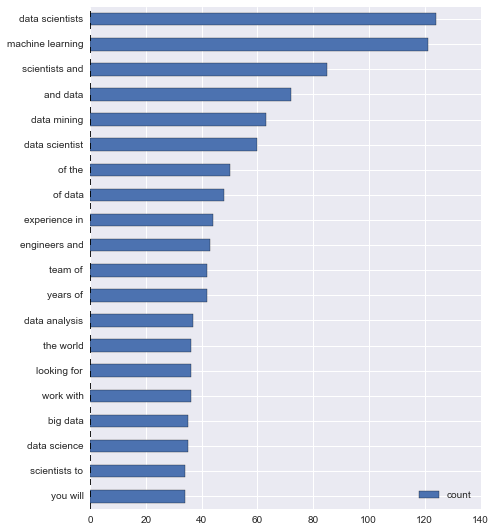

In [91]:
counts_summary_df[counts_df['count'] > 5].sort('count', ascending=False).head(20).sort('count').plot(kind='barh', figsize=(7,9))

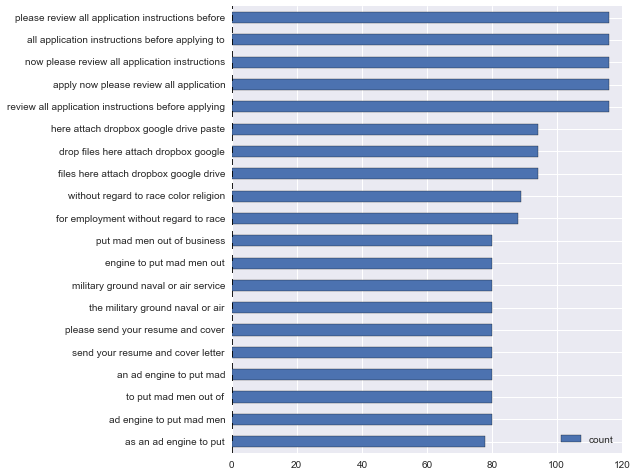

In [89]:
counts_text_df[counts_text_df['count'] > 5].sort('count', ascending=False).head(20).sort('count').plot(kind='barh', figsize=(7,8))

In [166]:
import timeit
from collections import deque

In [25]:
def count_2s(N):

    count = 0
 

    for num in xrange(1, N+1):

        count += list(str(num)).count(2)

    return count

In [26]:
def deque_n(n):

    nums = deque()

    while True:

        n, remainder = divmod(n, 10) # base 10 conv to digits = faster than str()
        nums.appendleft(remainder)
        
        if n == 0:
            break
    
    return list(nums)

def faster_count_d(N, d=2):

    count = 0

    for num in xrange(1, N + 1): # buffer in-memory xrange

        num_list = map(int, str(num))
        count += num_list.count(d)

    return count

In [27]:
%timeit count_2s(200000)  # 44

1 loops, best of 3: 563 ms per loop


In [28]:
%timeit faster_count_d(200000)

1 loops, best of 3: 2.54 s per loop


In [198]:
num = 255
numlist = [num >i & 1 for i in range(8)]
print numlist

[True, True, True, True, True, True, True, True]


In [149]:
%timeit for x in range(100): _

100000 loops, best of 3: 5.03 µs per loop


In [14]:
def brandons_list(num):

    numlst = []
    
    while(num):
        numlst  += [num%10]
        num    /=  10
        
    return numlst

In [15]:
brandons_list(123456789)

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [118]:


def faster_count(N, d=2):

#     get_num_list = lambda num: [int(i) for i in str(num)]
    #countInNumber = lambda num, count: len([i for i in str(num) if int(i)==count]) #counts the occurrence of a number in a number
    count = 0

    for num in xrange(1, N + 1): # buffer in-memory xrange

#         num_list = brandons_list(num)
#         num_list = get_num_list(num)
#         count += num_list.count(d)
        count += countInNumber(num, 2)

    return count

In [122]:
%timeit faster_count(2000000, d=2)

1 loops, best of 3: 2.32 s per loop


In [46]:

countInNumber(22234444422, 2)

5

In [36]:
numlst(222223333222).count(2)

8

In [117]:
def supercount():
    
    numbers = [list(str(num)) for num in list(xrange(1, 200000+1))]
    counts_df = pd.DataFrame(numbers)
    
    counts = 0

    for i in counts_df.columns:
        counts += counts_df[counts_df[i] == '2'][i].count()

    return counts



In [84]:
%timeit supercount()

1 loops, best of 3: 981 ms per loop


In [116]:
def countInNumber(num,count):
    
    total = 0
    
    while(num):
        total += num %10 == count
        # num /= 10
        num *= 0
    return total

In [87]:
countInNumber(200020, 2)

2

In [115]:
num = 200000

total = 0
total += num % 10 == total
print total

num /= 10

## iteration 2
total += num % 10 == total
print total
num *= 0.1
print num

## iteration 3
total += num * .1 == total
print total
num *= 0.1
print num

## iteration 4
total += num % 10 == total
print total
num *= 0.1
print num

## iteration 5
total += num % 10 == total
print total
num *= 0.1
print num


## iteration 6
total += num % 10 == total
print total
num *= 0.1
print num

1
1
2000.0
1
200.0
1
20.0
1
2.0
1
0.2
